# Build a Keras model

## Steps:
1. Specify Architecture (Specify number of hidden layers or neurons and activation function)
2. Compile (Initialise the model)
3. Fit (Use forward and backward propagation to find a set of optimal weights)
4. Predict

***

## Classification Problem

1. Loss function = **'categorical_crossentropy'** - by far the most common (similar to log loss: lower score is better)
2. **Metrics = ['accuracy']** should be add in the compile function for easy-to-understand diagnostics
3. Output layer has **separate** nodes for each target class
4. Use **'softmax'** as the activation function on the output layer - ensure the predictions from all output nodes sum to 1 (provides probability predictions)

Separate nodes example:
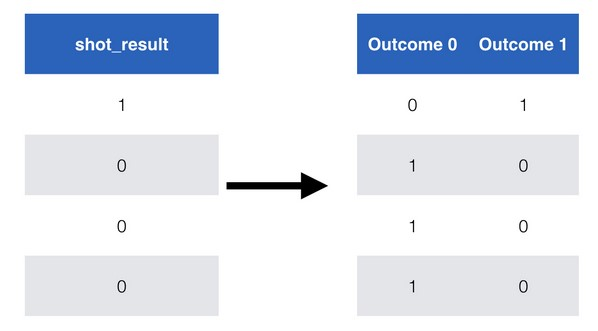

### Import modules

In [1]:
# need to install keras and tensorflow
# pip install keras==2.3.0
# pip install tensorflow==2.2
# Then restart jupyter notebook kernel
# pip show keras can show the version
import numpy as np    # Only for reading data
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical    # Help convert target variable into several class variables

Using TensorFlow backend.


### Read the data

In [2]:
# Import a binary classification dataset
data = np.genfromtxt("small_data.csv", delimiter = ',')
predictors = data[1:, 1:]
# convert original target variable into two variables (each variable for each class in the original target)
target = to_categorical(data[1:, 0])
n_cols = predictors.shape[1]    #get column number

print(predictors.shape)
print(target.shape)
print(n_cols)

(400, 200)
(400, 2)
200


In [3]:
predictors.shape

(400, 200)

In [4]:
target.shape

(400, 2)

In [5]:
n_cols

200

### Build the model

In [6]:
# Sequential model indicates that each layer has weights or connections only to the layer coming directly after it
# It is easier to build
model = Sequential()
# Add layers
# A Dense layer means that all of the nodes in the previous layer connect to all of the nodes in the current layer
# Dense(這一層的Nodes的數量, activation = 'relu', input_shape = (n_cols, ))，其中input layer必須設定input_shape這個參數
model.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
# output layer
model.add(Dense(2, activation = 'softmax'))

### Compile the model
1. Specify the optimiser (controls the learning rate): Try using 'sgd' (Stochastic gradient descent) as the optimizer to tune the learning rate
2. Specify the loss function: categorical_crossentropy is common for classification problems
3. Specify metrics = ['accuracy'] enables us to check current accuracy for each step

In [16]:
#model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fit the model

Scaling (normalising) the data improves the optimisation process: Subtract each feature by that feature's mean and divide it by it's standard deviation.

In [17]:
model.fit(predictors, target)

Epoch 1/1
400/400 [==============================] - 0s 667us/step - loss: nan - accuracy: 0.5000


### Save the model

Models are saved as hdf5 file

In [18]:
from keras.models import load_model
model.save('classification_model.h5')

### Reload the model

In [19]:
my_model = load_model('classification_model.h5')

### Make Predictions

In [20]:
class_predictions = my_model.predict(predictors)
print(class_predictions)
probability_true = class_predictions[:, 1]
probability_true

[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

### Print the model architecture

In [15]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 40,502
Trainable params: 40,502
Non-trainable params: 0
_________________________________________________________________


***

## Regression Problem

1. Loss function = **'relu'** - by far the most common (similar to log loss: lower score is better)
2. Output layer has only one node

### Import modules

In [45]:
# need to install keras and tensorflow
# pip install keras==2.3.0
# pip install tensorflow==2.2
# Then restart jupyter notebook kernel
# pip show keras can show the version
import numpy as np    # Only for reading data
from keras.layers import Dense
from keras.models import Sequential

### Read the data

In [46]:
data = np.genfromtxt("small_data.csv", delimiter = ',')
predictors = data[1:, 1:]
target = data[1:, 0]
n_cols = predictors.shape[1]    #get column number

print(predictors.shape)
print(target.shape)
print(n_cols)

(400, 200)
(400,)
200


### Build the model

In [47]:
# Sequential model indicates that each layer has weights or connections only to the layer coming directly after it
# It is easier to build
model = Sequential()
# Add layers
# A Dense layer means that all of the nodes in the previous layer connect to all of the nodes in the current layer
# Dense(這一層的Nodes的數量, activation = 'relu', input_shape = (n_cols, ))，其中input layer必須設定input_shape這個參數
model.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model.add(Dense(200, activation = 'relu'))
# Last layer only has one node --> output layer
model.add(Dense(1))

### Compile the model
1. Specify the optimiser (controls the learning rate): "Adam" is a good choice to optimise learning rate. "Adam" uses gradient descent to ensure reasonable values throughout the weight optimisation process
2. Specify the loss function: Mean Square Error is common for regression problems

In [48]:
model.compile(optimizer='adam', loss='mean_squared_error')

### Fit the model

Scaling (normalising) the data improves the optimisation process: Subtract each feature by that feature's mean and divide it by it's standard deviation.

In [49]:
model.fit(predictors, target)

Epoch 1/1
400/400 [==============================] - 0s 213us/step - loss: nan


---
# Test
---

In [22]:
def normalize(value,maxValue,minValue,maxRange,minRange):
    return ((value - (minValue - 0.01)) * (maxRange - (minRange))) / ((maxValue - 0.01) - (minValue - 0.01)) + (minRange)

In [29]:
cities = []

cities.append([60.1695213,24.9354496]); #1
cities.append([60.2052002,24.6522007]); #2
cities.append([61.4991112,23.7871208]); #3
cities.append([64.222176,27.72785]);    #4
cities.append([60.4514809,22.2686901]); #5
cities.append([65.0123596,25.4681606]); #6
cities.append([60.9826698,25.6615105]); #7
cities.append([62.8923798,27.6770306]); #8
cities.append([62.2414703,25.7208805]); #9
cities.append([61.4833298,21.7833309]); #10
cities.append([61.0587082,28.1887093]); #11
cities.append([63.0960007,21.6157703]); #12
cities.append([60.4664001,26.9458199]); #13
cities.append([62.601181,29.7631607]); #14
cities.append([60.9959602,24.4643402]); #15
cities.append([60.3923302,25.6650696]); #16
cities.append([61.6885681,27.2722702]); #17
cities.append([65.579287,24.196943]); #18
cities.append([65.986503,28.692848]); #19
cities.append([61.1272392,21.5112705]); #20

train_cities = np.array(cities)

for i in train_cities:
    i[0] = normalize(i[0],65.986503,60.1695213,0.99,0.01)
    i[1] = normalize(i[1],29.7631607,21.5112705,0.99,0.01)

train_labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
type(train_labels)

list

In [24]:
train_cities

array([[0.01168472, 0.41784541],
       [0.01769563, 0.38420658],
       [0.23568373, 0.28146911],
       [0.69444458, 0.74947275],
       [0.05918709, 0.10113927],
       [0.82756859, 0.48111052],
       [0.14867768, 0.50407289],
       [0.47041082, 0.7434374 ],
       [0.36075063, 0.51112371],
       [0.233025  , 0.04349768],
       [0.16148804, 0.80420471],
       [0.50471529, 0.02359807],
       [0.06170056, 0.65659833],
       [0.42135191, 0.99118761],
       [0.15091674, 0.36189614],
       [0.04922184, 0.50449557],
       [0.26760196, 0.69536778],
       [0.92308013, 0.33013987],
       [0.99168472, 0.86407655],
       [0.17303361, 0.01118761]])

In [44]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (2,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

In [45]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['accuracy'])

In [48]:
model.fit(train_cities, train_labels)

Epoch 1/1
20/20 [==============================] - 0s 0us/step - loss: 37.2881 - accuracy: 0.0500


In [49]:
predictions = model.predict(train_cities)
print(predictions)

[[ 9.47119  ]
 [ 9.195901 ]
 [ 9.714806 ]
 [16.37035  ]
 [ 7.163011 ]
 [15.434869 ]
 [10.968927 ]
 [14.88313  ]
 [12.3056135]
 [ 7.9348207]
 [13.94732  ]
 [ 9.930827 ]
 [12.029143 ]
 [16.973246 ]
 [ 9.7855625]
 [10.480045 ]
 [13.361796 ]
 [15.2594595]
 [19.377869 ]
 [ 7.2794256]]
